In [ ]:
numpy 
pandas
matplotlib 
sklearn 
opencv

## AGI?
Artificial Genreal Intelligence

AI : General Solution --> Specific Problem                  
AI : General Solutuin --> Gneral Problems ( AGI ) 

International Business Machines

**Types of learning:** 

1. Supervised learning ( correct model mistakes ) 
2. Unsupervised learning ( there is no known right anwser ) 
3. Self Supervised [Reinforcement learning, Q learning]  ( model corrects itself )

* Semi-supervised learning ( Taks 1 ) 

* Supervised learning         
1- Classification :Binary , Categorical               
2- Regression : Calculate Actual value                     


* Unsupervised learning                      
3- Clustering ( Grouping ) : Divide data into groups. 

 Deep Learning: 

4- Generation ( generate )            


NeuroEvolution


Machine learning ==> Data Modeling                

Types of models: 

1. Statistical Model 
2. Non Statistical Model 


**Task 2 : Revise Types of models**

<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

**Python libs for Machine Learning**

1. Sklearn 
2. Scipy 
3. Pyspark 
4. Mlflow 
5. Clearml


**C++**
1. MLPack
2. (CNTK) Microsoft Congitive Toolkit 

**Apple**
1. Core ML

In [1]:
import pandas as pd
import numpy as np
# science kit learn 
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
df.area.min()

2600

In [4]:
df.area.max()

4000

 Equation: <br>
 y ( prices )   = m (factor ) x ( input area )  + b ( bais ) 

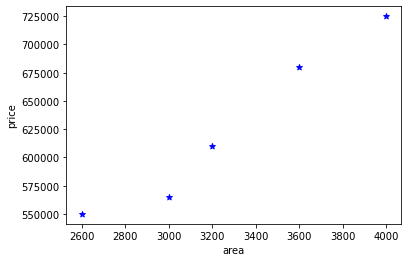

In [5]:
plt.xlabel('area')
plt.ylabel('price') 
plt.scatter(df.area,df.price, color='blue' ,marker='*',)
plt.show()

In [ ]:
y = mx + c ( m , c) 

In [6]:
area = df.drop('price',axis='columns')
print(type(area))
area

<class 'pandas.core.frame.DataFrame'>


,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
price = df.price
print(type(price))
price

<class 'pandas.core.series.Series'>


0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [8]:
# Create linear regression object
reg = linear_model.LinearRegression() # instance of linear regression model
reg.fit(area,price) # fitting data into regression model, training
#model.fit(x, y) x : all features , y : value to be predicted

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [9]:
reg.predict([[3300]])

array([628715.75342466])

In [10]:
reg.predict([[3200], [3300] , [4200]])

array([615136.98630137, 628715.75342466, 750924.65753425])

In [11]:
reg.predict([[2600]])

array([533664.38356164])

In [10]:
reg.score(area,price) # calculate accuracy 

0.9584301138199486

y = mx + b

In [11]:
reg.coef_ # M 

array([135.78767123])

In [12]:
reg.intercept_ #b

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [13]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [16]:
reg.predict([[5000]])

array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [14]:
area_df = pd.read_csv("areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [15]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
type(p)

numpy.ndarray

In [16]:
area_df['prices']= p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [21]:
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
area_df.to_csv("prediction.csv", index=False)

In [19]:
area_df.to_json("prediction.json")

In [ ]:
y = mx + c ( m , c) 

In [24]:
testdf = pd.read_csv("prediction.csv")
testdf["prices"][0]

316404.1095890411

<h3>Exercise</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

<h3>Answer</h3>

41288.69409442